<a href="https://colab.research.google.com/github/MariaGodoi/cn1t2/blob/main/Quest%C3%A3o4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



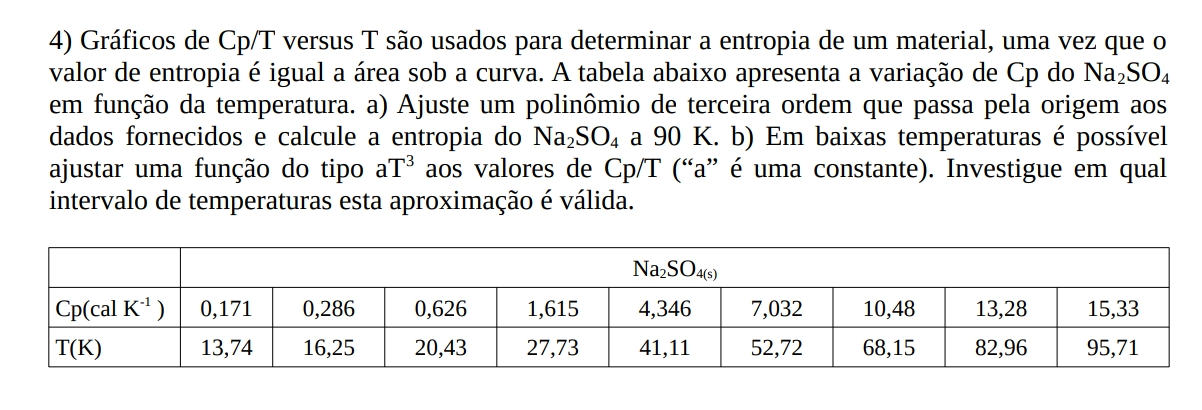



Parâmetros do polinômio de terceira ordem:
a = 0.000741, b = 0.000059, c = -0.000001

a) Entropia do Na₂SO₄ a 90 K: 8.7929 cal K⁻¹

b) Investigação da validade da aproximação aT³:
Intervalo	Parâmetro a		R²
0-20 K	4.287938e-06		0.8202
0-25 K	3.771817e-06		0.9352
0-30 K	2.915597e-06		0.9217
0-35 K	2.915597e-06		0.9217
0-40 K	2.915597e-06		0.9217
0-45 K	1.664772e-06		0.8193
0-50 K	1.664772e-06		0.8193
0-55 K	1.061449e-06		0.7168
0-60 K	1.061449e-06		0.7168

Melhor intervalo para aproximação aT³: 0-25 K
Parâmetro a ótimo: 3.771817e-06
Coeficiente de determinação R²: 0.9352


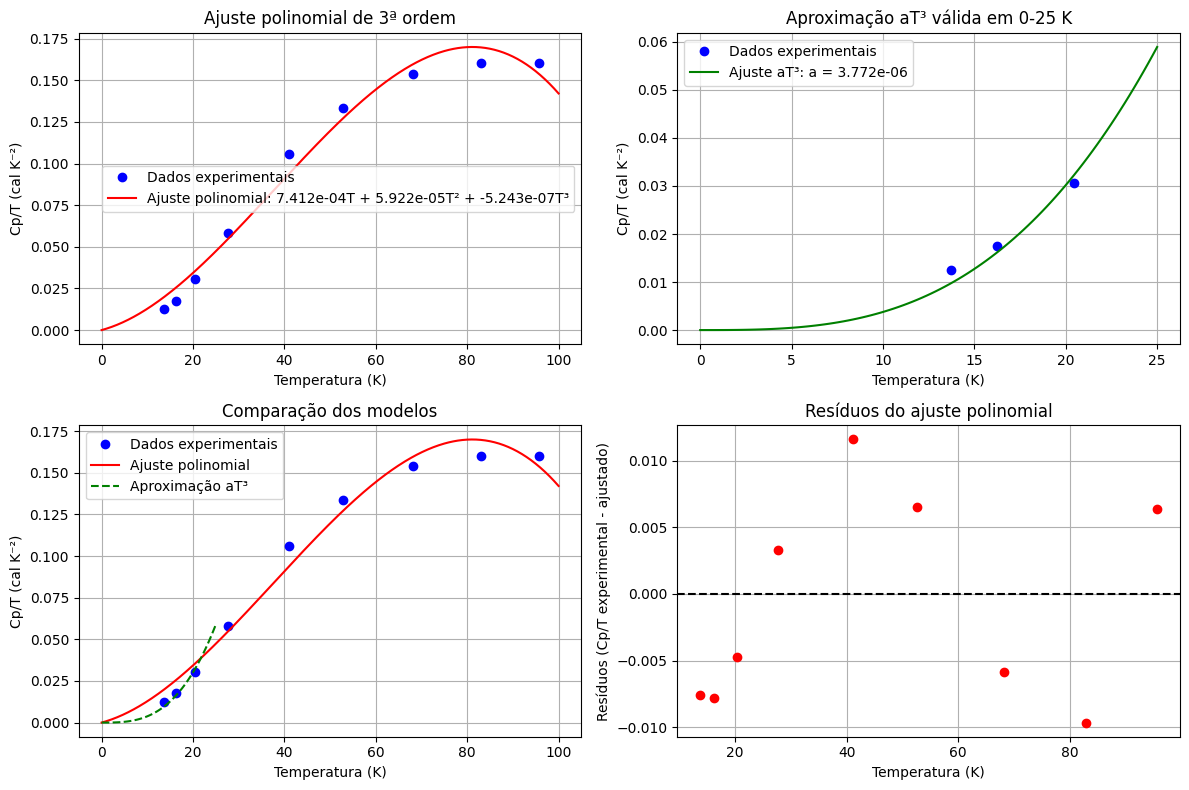


RESULTADOS FINAIS:
a) Entropia do Na₂SO₄ a 90 K: 8.7929 cal K⁻¹
b) Aproximação aT³ é válida no intervalo: 0-25 K
   Parâmetro a = 3.771817e-06
   Coeficiente de determinação R² = 0.9352


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit

# Dados fornecidos
T = np.array([13.74, 16.25, 20.43, 27.73, 41.11, 52.72, 68.15, 82.96, 95.71])  # Temperatura (K)
Cp = np.array([0.171, 0.286, 0.626, 1.615, 4.346, 7.032, 10.48, 13.28, 15.33])  # Cp (cal K⁻¹)

# Calculando Cp/T
Cp_T = Cp / T

# a) Ajuste de polinômio de terceira ordem que passa pela origem
def poly_3rd_order(x, a, b, c):
    """Polinômio de terceira ordem que passa pela origem: f(x) = a*x + b*x² + c*x³"""
    return a*x + b*x**2 + c*x**3

# Ajuste dos dados
params, covariance = curve_fit(poly_3rd_order, T, Cp_T)
a, b, c = params

print("Parâmetros do polinômio de terceira ordem:")
print(f"a = {a:.6f}, b = {b:.6f}, c = {c:.6f}")

# Função ajustada
def fitted_function(x):
    return poly_3rd_order(x, a, b, c)

    # Cálculo da entropia a 90 K (área sob a curva de 0 a 90 K)
S_90K, error = integrate.quad(fitted_function, 0, 90)
print(f"\na) Entropia do Na₂SO₄ a 90 K: {S_90K:.4f} cal K⁻¹")

# b) Ajuste da função aT³ em baixas temperaturas
def cubic_law(T, a):
    """Lei cúbica: Cp/T = a*T³"""
    return a * T**3

# Vamos testar o ajuste em diferentes intervalos de temperatura
temperatures_to_test = [
    (0, 20), (0, 25), (0, 30), (0, 35), (0, 40),
    (0, 45), (0, 50), (0, 55), (0, 60)
]

print("\nb) Investigação da validade da aproximação aT³:")
print("Intervalo\tParâmetro a\t\tR²")

best_interval = None
best_r2 = -np.inf

for i, (T_min, T_max) in enumerate(temperatures_to_test):
    # Selecionar dados no intervalo
    mask = (T >= T_min) & (T <= T_max)
    T_subset = T[mask]
    Cp_T_subset = Cp_T[mask]

    if len(T_subset) < 2:
        continue

    # Ajuste da função cúbica
    try:
        a_param, _ = curve_fit(cubic_law, T_subset, Cp_T_subset)

        # Calcular R²
        y_pred = cubic_law(T_subset, a_param[0])
        ss_res = np.sum((Cp_T_subset - y_pred)**2)
        ss_tot = np.sum((Cp_T_subset - np.mean(Cp_T_subset))**2)
        r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0

        print(f"{T_min}-{T_max} K\t{a_param[0]:.6e}\t\t{r2:.4f}")

        # Encontrar o melhor intervalo (maior R²)
        if r2 > best_r2:
            best_r2 = r2
            best_interval = (T_min, T_max)
            best_a = a_param[0]

    except:
        continue

print(f"\nMelhor intervalo para aproximação aT³: {best_interval[0]}-{best_interval[1]} K")
print(f"Parâmetro a ótimo: {best_a:.6e}")
print(f"Coeficiente de determinação R²: {best_r2:.4f}")

# Visualização dos resultados
plt.figure(figsize=(12, 8))

# Gráfico 1: Dados experimentais e ajuste polinomial
plt.subplot(2, 2, 1)
T_plot = np.linspace(0, 100, 500)
plt.plot(T, Cp_T, 'bo', label='Dados experimentais')
plt.plot(T_plot, fitted_function(T_plot), 'r-', label=f'Ajuste polinomial: {a:.3e}T + {b:.3e}T² + {c:.3e}T³')
plt.xlabel('Temperatura (K)')
plt.ylabel('Cp/T (cal K⁻²)')
plt.title('Ajuste polinomial de 3ª ordem')
plt.legend()
plt.grid(True)

# Gráfico 2: Aproximação aT³ no melhor intervalo
plt.subplot(2, 2, 2)
mask_best = (T >= best_interval[0]) & (T <= best_interval[1])
T_best = T[mask_best]
Cp_T_best = Cp_T[mask_best]

T_plot_best = np.linspace(best_interval[0], best_interval[1], 100)
plt.plot(T_best, Cp_T_best, 'bo', label='Dados experimentais')
plt.plot(T_plot_best, cubic_law(T_plot_best, best_a), 'g-',
         label=f'Ajuste aT³: a = {best_a:.3e}')
plt.xlabel('Temperatura (K)')
plt.ylabel('Cp/T (cal K⁻²)')
plt.title(f'Aproximação aT³ válida em {best_interval[0]}-{best_interval[1]} K')
plt.legend()
plt.grid(True)

# Gráfico 3: Comparação dos dois modelos
plt.subplot(2, 2, 3)
plt.plot(T, Cp_T, 'bo', label='Dados experimentais')
plt.plot(T_plot, fitted_function(T_plot), 'r-', label='Ajuste polinomial')
plt.plot(T_plot_best, cubic_law(T_plot_best, best_a), 'g--', label='Aproximação aT³')
plt.xlabel('Temperatura (K)')
plt.ylabel('Cp/T (cal K⁻²)')
plt.title('Comparação dos modelos')
plt.legend()
plt.grid(True)

# Gráfico 4: Resíduos do ajuste polinomial
plt.subplot(2, 2, 4)
residuals = Cp_T - fitted_function(T)
plt.plot(T, residuals, 'ro')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Temperatura (K)')
plt.ylabel('Resíduos (Cp/T experimental - ajustado)')
plt.title('Resíduos do ajuste polinomial')
plt.grid(True)

plt.tight_layout()
plt.show()

# Resultados finais
print("\n" + "="*60)
print("RESULTADOS FINAIS:")
print("="*60)
print(f"a) Entropia do Na₂SO₄ a 90 K: {S_90K:.4f} cal K⁻¹")
print(f"b) Aproximação aT³ é válida no intervalo: {best_interval[0]}-{best_interval[1]} K")
print(f"   Parâmetro a = {best_a:.6e}")
print(f"   Coeficiente de determinação R² = {best_r2:.4f}")